# Backout prediction Model

In [11]:
#importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/home/user/Downloads/elective/project/backout/knn.csv', sep = ',', header = None, engine = 'python', encoding = 'latin-1')
s=data
x = s[[2]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled)
s[[2]]=df[[0]]
s[[2]]=100-(s[[2]].round(2))
x = data.drop([3], axis=1)
y = data[3]
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 16, stratify=y)
clf = KNN(n_neighbors = 10)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )


Test F1 Score     0.9285714285714286


# Elbow method

Text(0.5, 1.0, 'Elbow Curve for test')

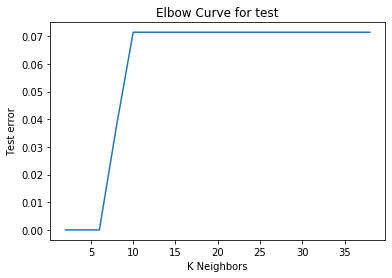

In [12]:
def Elbow(K):
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error
k = range(2, 40, 2)
test = Elbow(k)

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [13]:
clf = KNN(n_neighbors = 6)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )
print(test_y)


Test F1 Score     1.0
19    1
45    0
10    1
52    1
34    1
4     1
33    1
56    1
47    1
17    1
35    1
55    1
37    1
24    0
1     1
Name: 3, dtype: int64


# Testing model accuracy

In [14]:
def testing_knn(n,clf):
    p=pd.read_csv(n, sep = ',', header = None, engine = 'python', encoding = 'latin-1')
    l = p[[2]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
    x_scaled = min_max_scaler.fit_transform(l)
    df=pd.DataFrame(x_scaled)
    p[[2]]=df[[0]]
    p[[2]]=100-(p[[2]].round(2))
    t = p.drop([3], axis=1)
    u = p[3]
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(t)
    k = f1_score(test_predict1, u)
    print('Test F1 Score    ', k )

# Backout prediction of a single student


In [15]:

    
    
def knn_student_prediction(n,clf):
    p=pd.read_csv(n, sep = ',', header = None, engine = 'python', encoding = 'latin-1')
    keam_min_rank=1
    keam_max_rank=50000
    p[[2]]=((p[[2]]-keam_min_rank)/(keam_max_rank-keam_min_rank))*100
    print(p[[2]])
    p[[2]]=100-(p[[2]].round(2))
    print(p[[2]])
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(p)
    print(test_predict1)
    if(test_predict1==0):
        print("student should backout")
    elif(test_predict1==1):
        print("student could successfully complete the course!")
    

    


# Backout prediction of students in a dataset

(input: A dataset of the csv format)

In [16]:
def knn_dataset_prediction(n,clf):
    p=pd.read_csv(n, sep = ',', header = None, engine = 'python', encoding = 'latin-1')
    l = p[[2]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
    x_scaled = min_max_scaler.fit_transform(l)
    df=pd.DataFrame(x_scaled)
    p[[2]]=df[[0]]
    p[[2]]=100-(p[[2]].round(2))
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(p)
    print(test_predict1)


# Displaying the working of model

In [ ]:
print("enter your data")
print("Press 0 for testing model accuracy")
print("Press 1 for entering dataset")
print("press 2 for entering individual student data:")
p=int(input())
if(p==0):
    n=input("Type a dataset's path:")
    testing_knn(n,clf)
elif(p==2):
    import csv
    with open('inputs.csv', 'w') as f:
        w = csv.writer(f, quoting=csv.QUOTE_ALL) 
        aisse=float(input("enter your 10th marks:"))
        hse=float(input("enter your 12th marks:"))
        keam_rank=float(input("enter your keam rank:"))
        w.writerow([aisse,hse,keam_rank])
    n= "/home/user/Downloads/elective/project/dropout/inputs.csv"
    knn_student_prediction(n,clf)
elif(p==1):
    n=input("Type a dataset's path:")
    knn_dataset_prediction(n,clf)

enter your data
Press 0 for testing model accuracy
Press 1 for entering dataset
press 2 for entering individual student data:
1
